<a href="https://colab.research.google.com/github/yvuldzhev/Azure-HDInsight-Kafka/blob/master/kafka_latency_7prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#dataframe= pd.read_csv("lettera.csv", delimiter=','sep=r', ') 
data = pd.read_csv("/content/7prods2.csv", delimiter=',')
data

,topic,created,received,latency
0,contracts,1622704146890,1622704146952,62
1,contracts,1622704146890,1622704146952,62
2,orders,1622704146905,1622704146952,47
3,orders,1622704146905,1622704146968,63
4,contracts,1622704146921,1622704146968,47
...,...,...,...,...
8995,orders,1622704288848,1622704288926,78
8996,orders,1622704288926,1622704288973,47
8997,orders,1622704288973,1622704289035,62
8998,orders,1622704289035,1622704289113,78


In [17]:
df=pd.DataFrame(data)
df

,topic,created,received,latency
0,contracts,1622704146890,1622704146952,62
1,contracts,1622704146890,1622704146952,62
2,orders,1622704146905,1622704146952,47
3,orders,1622704146905,1622704146968,63
4,contracts,1622704146921,1622704146968,47
...,...,...,...,...
8995,orders,1622704288848,1622704288926,78
8996,orders,1622704288926,1622704288973,47
8997,orders,1622704288973,1622704289035,62
8998,orders,1622704289035,1622704289113,78


In [18]:
df.describe

<bound method NDFrame.describe of           topic        created       received  latency
0     contracts  1622704146890  1622704146952       62
1     contracts  1622704146890  1622704146952       62
2        orders  1622704146905  1622704146952       47
3        orders  1622704146905  1622704146968       63
4     contracts  1622704146921  1622704146968       47
...         ...            ...            ...      ...
8995     orders  1622704288848  1622704288926       78
8996     orders  1622704288926  1622704288973       47
8997     orders  1622704288973  1622704289035       62
8998     orders  1622704289035  1622704289113       78
8999     orders  1622704289113  1622704289160       47

[9000 rows x 4 columns]>

In [19]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['topic', 'created', 'received', 'latency'], dtype='object')

In [20]:
df['latency'] = df['latency'].astype(float)

In [21]:
q95 = df["latency"].quantile(0.95)
q95

79.0

In [22]:
q50 = df["latency"].quantile(0.50)
q50

62.0

In [28]:
avg = df['latency'].mean()
avg

68.2401111111111

In [32]:
median = df['latency'].median()
median

62.0

In [31]:
df['latency'].describe(percentiles=[.10, .50, .80, .90, .95, .99])

count    9000.000000
mean       68.240111
std        50.754026
min        16.000000
10%        47.000000
50%        62.000000
80%        78.000000
90%        78.000000
95%        79.000000
99%       375.150000
max       672.000000
Name: latency, dtype: float64

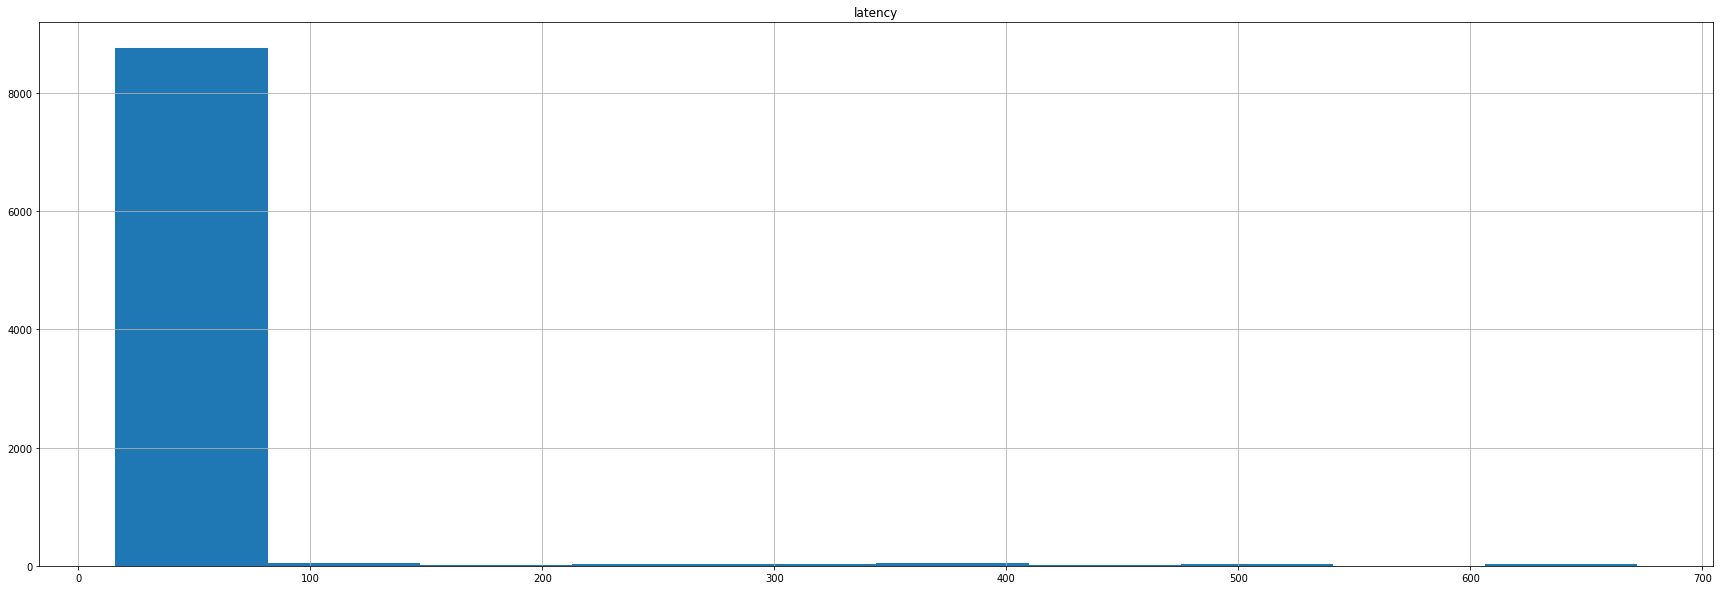

In [23]:
features = ["latency"]
df[features].hist(figsize=(30, 10));

In [24]:
lower = df.latency.quantile(.05)
upper = df.latency.quantile(.95)

df_filtered = df[(df["latency"] < upper) & (df["latency"] > lower)]

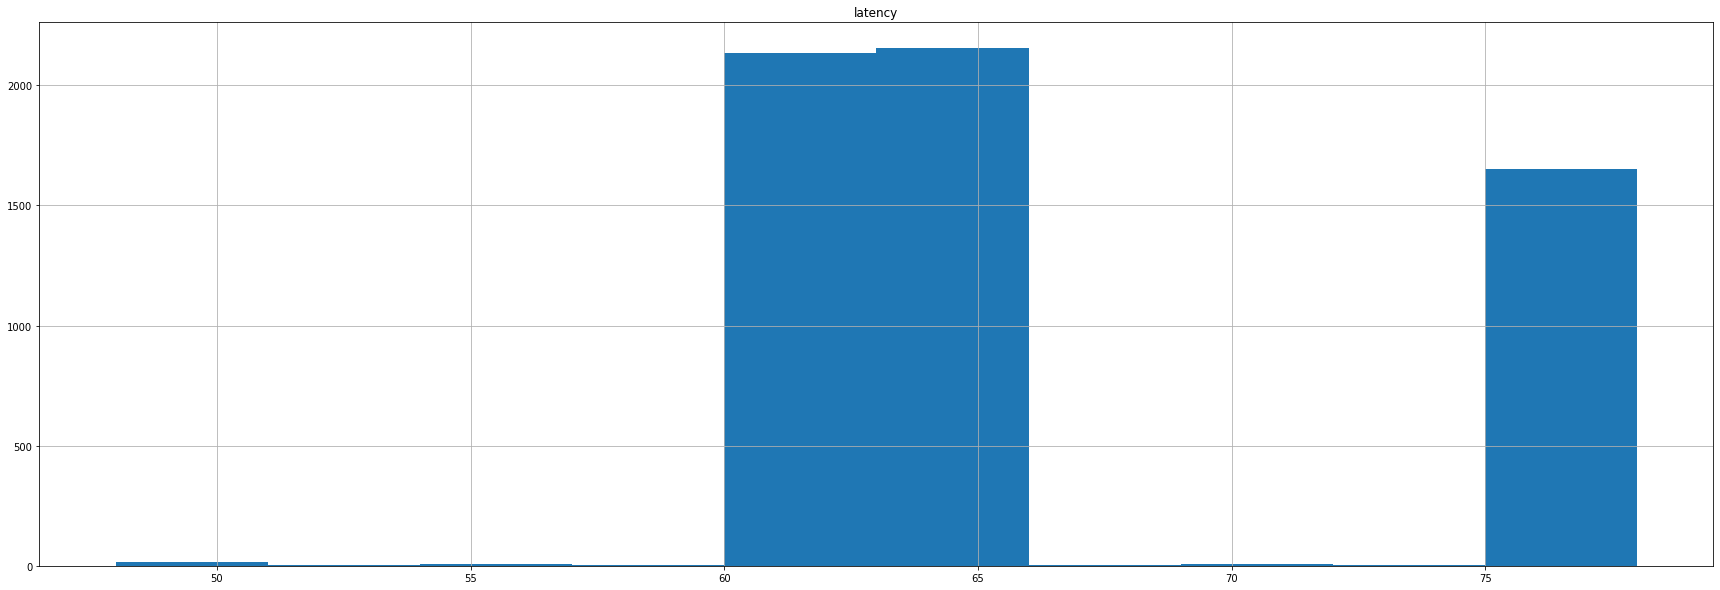

In [25]:
features = ["latency"]
df_filtered[features].hist(figsize=(30, 10));

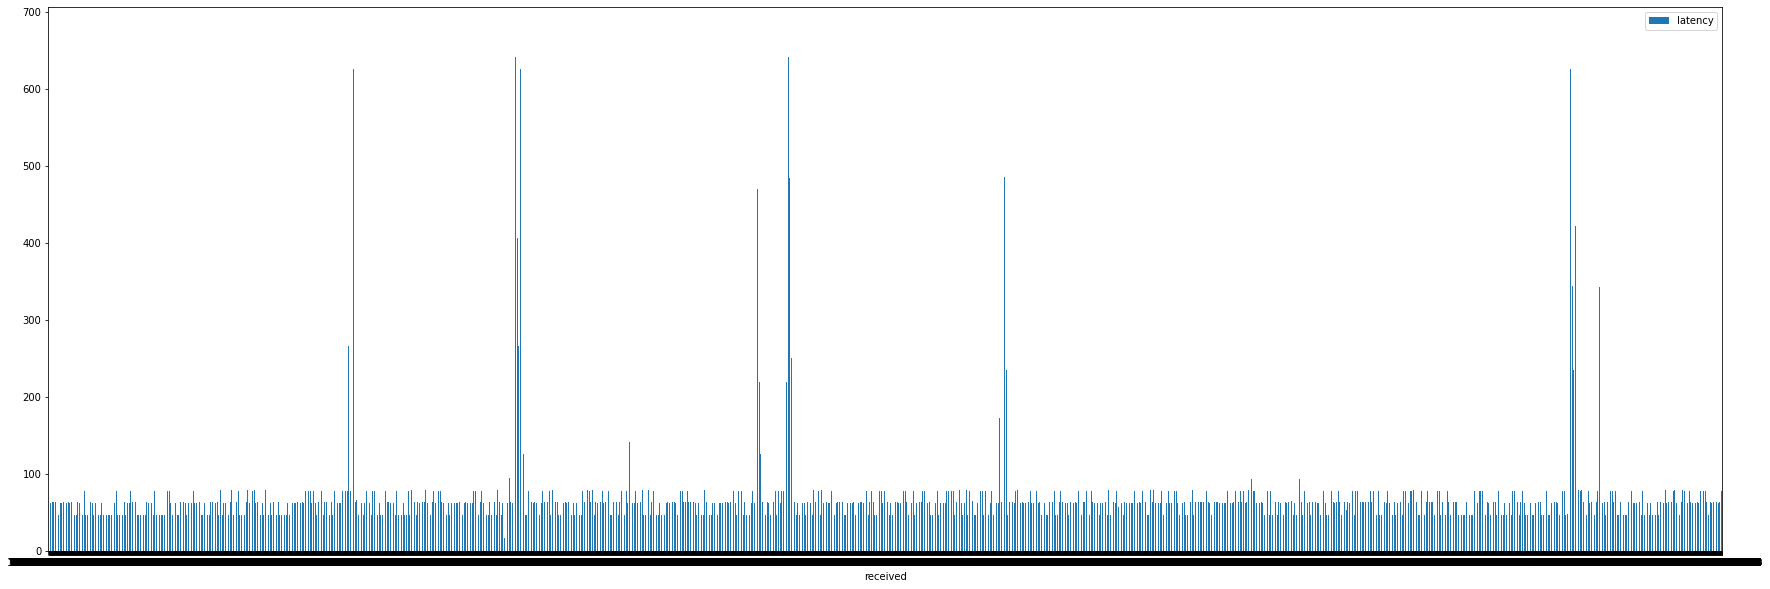

In [26]:
#df.plot(figsize=[30,10]).bar(y='latency', x='received')
#df.plot(kind='bar',figsize=(30,15)).bar(y='latency', x='received')
df.plot.bar(x='received', y='latency', rot=0, figsize=(30, 10))

# New Section